In [1]:
import pandas

In [2]:
# dataframe
inspections = pandas.read_csv('data/input/Food_Inspections.csv')

In [3]:
inspections

,Inspection ID,DBA Name,AKA Name,License #,Facility Type,Risk,Address,City,State,Zip,Inspection Date,Inspection Type,Results,Violations,Latitude,Longitude,Location
0,1990078,THE DUGOUT,THE DUGOUT,2492994.0,Restaurant,Risk 2 (Medium),950 W ADDISON ST,CHICAGO,IL,60613.0,03/03/2017,License Re-Inspection,Pass,2. FACILITIES TO MAINTAIN PROPER TEMPERATURE -...,41.947360,-87.653932,"(41.947359980046166, -87.65393244544859)"
1,1990074,THE SHRIMP SHACK,THE SHRIMP SHACK,1939047.0,Restaurant,Risk 1 (High),6601 W ARCHER AVE,CHICAGO,IL,60638.0,03/03/2017,Canvass,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.792139,-87.786748,"(41.792138942200104, -87.78674847587374)"
2,1990052,CARRIBEAN JERK PALACE,CARRIBEAN JERK PALACE,2385577.0,Restaurant,Risk 1 (High),3792 W 79TH ST,CHICAGO,IL,60652.0,03/03/2017,Canvass Re-Inspection,Pass,"14. PREVIOUS SERIOUS VIOLATION CORRECTED, 7-42...",41.749742,-87.717946,"(41.749741862819484, -87.7179463916298)"
3,1990054,"PITA CAFE, INC.",PITA CAFE,2390567.0,Restaurant,Risk 1 (High),2014 W DIVISION ST,CHICAGO,IL,60622.0,03/03/2017,Canvass,Fail,19. OUTSIDE GARBAGE WASTE GREASE AND STORAGE A...,41.903289,-87.677914,"(41.903289141646646, -87.67791409556975)"
4,1990001,YMCA ORR FAMILY DEVELOPMENT CENTER,YMCA ORR FAMILY DEVELOPMENT CENTER,2215710.0,Children's Services Facility,Risk 1 (High),730 N PULASKI RD,CHICAGO,IL,60624.0,03/02/2017,License,Pass,"34. FLOORS: CONSTRUCTED PER CODE, CLEANED, GOO...",41.894448,-87.726203,"(41.89444827833687, -87.72620304790371)"
5,1982953,CERISE,CERISE,2314274.0,Restaurant,Risk 1 (High),203 N WABASH AVE,CHICAGO,IL,60601.0,02/09/2017,Canvass,Pass,NaN,41.885828,-87.626138,"(41.885828292802344, -87.62613826248786)"
6,1990046,FAIRFIELD ACD,FAIRFIELD ACD,26701.0,School,Risk 1 (High),6201 S Fairfield (2732W),CHICAGO,IL,60629.0,03/03/2017,Canvass,Fail,18. NO EVIDENCE OF RODENT OR INSECT OUTER OPEN...,41.780868,-87.692078,"(41.78086789054542, -87.69207758441868)"
7,1990041,ST. REST COUNTRY KITCHEN,ST REST COUNTRY KITCHEN,2355187.0,Restaurant,Risk 1 (High),727 E 87TH ST,CHICAGO,IL,60619.0,03/03/2017,Complaint,Pass,33. FOOD AND NON-FOOD CONTACT EQUIPMENT UTENSI...,41.736520,-87.606186,"(41.73652030530036, -87.60618644626399)"
8,1990034,MELVILLE FULLER ELEMENTARY,MELVILLE FULLER ELEMENTARY,23271.0,School,Risk 1 (High),4214 S St Lawrence (600E),CHICAGO,IL,60653.0,03/03/2017,Canvass,Pass,"35. WALLS, CEILINGS, ATTACHED EQUIPMENT CONSTR...",41.818006,-87.611821,"(41.81800609529322, -87.61182077063333)"
9,1990029,SOUTH CHICAGO YMCA,SOUTH CHICAGO SENIOR CENTER,2046670.0,Golden Diner,Risk 1 (High),3039 E 91ST ST FL,CHICAGO,IL,60617.0,03/03/2017,Canvass,Pass,32. FOOD AND NON-FOOD CONTACT SURFACES PROPERL...,41.729982,-87.549716,"(41.72998212286057, -87.54971598010755)"


In [4]:
len(inspections)

144896

In [6]:
# http://stackoverflow.com/questions/19482970/get-list-from-pandas-dataframe-column-headers#19483025
list(inspections.columns.values)

['Inspection ID',
 'DBA Name',
 'AKA Name',
 'License #',
 'Facility Type',
 'Risk',
 'Address',
 'City',
 'State',
 'Zip',
 'Inspection Date',
 'Inspection Type',
 'Results',
 'Violations',
 'Latitude',
 'Longitude',
 'Location']

In [7]:
# discard rows with any missing values
# http://stackoverflow.com/questions/13413590/how-to-drop-rows-of-pandas-dataframe-whose-value-in-certain-columns-is-nan
inspections_discard_missing_data = inspections.dropna()
len(inspections_discard_missing_data)

113555

In [8]:
# http://stackoverflow.com/questions/17071871/select-rows-from-a-dataframe-based-on-values-in-a-column-in-pandas
# inspections_risk1 = inspections_discard_missing_data.loc[inspections_discard_missing_data['Risk'] == ('Risk 1 (High)')]

# str.contains works. I tried .filter but must have used it incorrectly
inspections_risk1 = inspections_discard_missing_data[inspections_discard_missing_data['Risk'].str.contains('Risk 1')]
len(inspections_risk1)

83288

In [9]:
# http://pandas.pydata.org/pandas-docs/stable/text.html
# http://pandas.pydata.org/pandas-docs/version/0.17.0/generated/pandas.Series.str.contains.html
# case insensitive find RODENT or rodent or Rodent
rodent = inspections_risk1[inspections_risk1['Violations'].str.contains('rodent', case=False)]
len(rodent)

22436

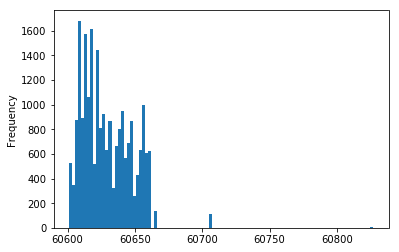

In [10]:
# http://pandas.pydata.org/pandas-docs/stable/visualization.html
# http://stackoverflow.com/questions/31609600/jupyter-ipython-notebook-not-plotting
%matplotlib inline
rodent['Zip'].plot.hist(bins=100)

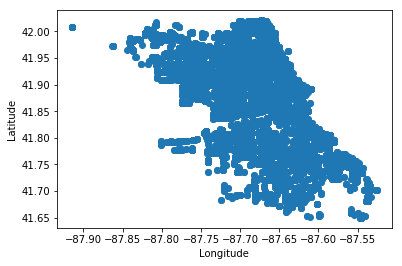

In [11]:
# http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot
import matplotlib.pyplot as plt
%matplotlib inline
mpl_fig = plt.figure()
ax = mpl_fig.add_subplot(111)
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
# plt.contour(rodent['Latitude'], rodent['Longitude'], rodent['Zip'])
plt.plot(rodent['Longitude'], rodent['Latitude'], marker='o', linestyle='None')